# Demo of `saverep` from `mackelab.plot`

## Why?

We generate lots of figures. **It's important to be able to go back to the state of the code generating a given figure.** Storing a plain figure in Dropbox will not tell you what the latest git commit was. You could add the revision hash to the filename, but a cleaner solution is to save a text file (sharing the same basename) containing that info (possibly containing comments and additional meta data as well). 

`saverep` is a short function helping with that.

## Getting the code

The `saverep` function is part of a module containing code shared across the lab. Here's how to get it:
https://github.com/mackelab/mackelab

## How to use it

### ... say, we generate a plot, everything as usual

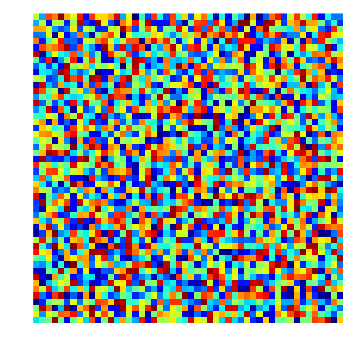

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

random_numbers = np.random.rand(50, 50)
plt.imshow(random_numbers, interpolation='none')
plt.axis('off')
plt.show()

### The usual way of saving a PDF ...

... would be to call something along the lines of `plt.savefig('~/Dropbox/random_numbers/demo.pdf')`

### Instead, import `saverep` and substitute it for `plt.savefig`

In [13]:
from mackelab.plot import saverep

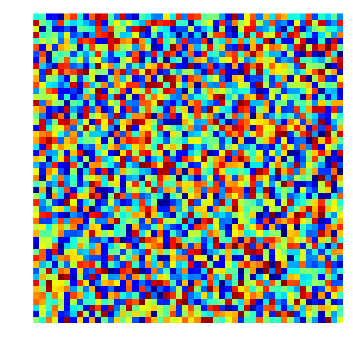

In [15]:
random_numbers = np.random.rand(50, 50)
plt.imshow(random_numbers, interpolation='none')
plt.axis('off')

saverep('/home/jm/Dropbox/random_numbers/demo')  # instead of plt.savefig

**Note that the argument to `saverep` is the path plus basename instead of path plus filename, that is no file extension is specified.**

This will do the following:
- Create a PDF version of the plot (`demo.pdf`) in the folder `/home/jm/Dropbox/random_numbers/`
- Create a PNG version of the plot (`demo.png`) in that folder
- **Create a TXT file (`demo.txt`) containing additional info in that folder, including the hash of the latest git commit. Assuming you commited right before making the plot, this ensures reproducibility**

## Storing comments

An additional feature is passing a string as a comment, e.g.:

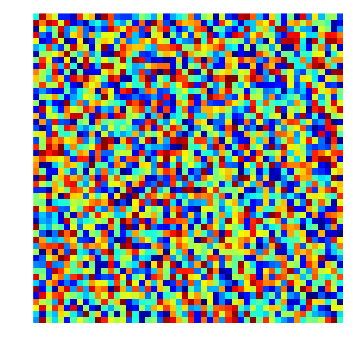

In [17]:
np.random.seed(42)
random_numbers = np.random.rand(50, 50)
plt.imshow(random_numbers, interpolation='none')
plt.axis('off')

saverep('/home/jm/Dropbox/random_numbers/demo', comment='50 by 50 random numbers, using seed 42')

The contents of the text file now are:

In [18]:
!cat /home/jm/Dropbox/random_numbers/demo.txt

basename : /home/jm/Dropbox/random_numbers/demo
comment : 50 by 50 random numbers, using seed 42
creation : 2017-04-04 17:33:12.258601
git_revision_hash : fc84d90a2456376b7f4e667f20412905350076d


## Why are PNGs useful? 

You may wonder why bother saving a PNG version: A PNG can be easily embedded in a Github issue, or a wiki entry. Just right click the file in Dropbox and create a shareable link (e.g. https://www.dropbox.com/s/lp5ejozfn9af358/demo.png?dl=0). **If the link ends on `dl=0` change this to `dl=1`**. Now the figure can be embedded anywhere where markdown is supported, that is:

```![](https://www.dropbox.com/s/lp5ejozfn9af358/demo.png?dl=1)```

Trying out right here:

![](https://www.dropbox.com/s/lp5ejozfn9af358/demo.png?dl=1)

If you don't want a PNG version, you can pass `png=False` as an argument to `savefig`.